In [2]:
#importing libraries and packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, LineString, Point

In [3]:
#reading in shapefile of durham county police beats
#beats = gpd.read_file("/Users/morganbernstein/Desktop/Data+/filtered_beats/filtered_beats.shp")

#reading in csv files of the clean data and one with the longitude and latitude coordinates
data = pd.read_csv("/Users/morganbernstein/Desktop/DATA+/SToPAGetDurhamData/10 Clean Data/!FINAL RAW DATA.csv", index_col = [0])
long_lat = pd.read_csv("/Users/morganbernstein/Desktop/DATA+/SToPAGetDurhamData/ARCHIVES/Intermediate csv's/latitude_longitude.csv", index_col = [0])

/var/folders/kc/zg1krfm17h74s97_rljtrhpr0000gn/T/ipykernel_32372/2974843125.py:6: DtypeWarning: Columns (55,60,61,63,64,65,66,67,69,70,71,72,75,77,138,139,141,142,143,144,145,147,148,149,150,151,153,154,155,156,157,159,160,161,162,163,165,166,167,168,169,171,172,173,174,175,177,178,179,180,181,183,184,185,186,187,189,190,191,192,193,195,196,197,198,199,201,202,203,204,205,207,208,209,210,211,213,214,215,216,217,219,220,221,222,223,225,226,227,228,229,231,232,233) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/morganbernstein/Desktop/DATA+/SToPAGetDurhamData/10 Clean Data/!FINAL RAW DATA.csv", index_col = [0])


In [6]:
#reading in shapefile of durham county
durham_county = gpd.read_file("/Users/morganbernstein/Desktop/DATA+/DurhamBlockMap/DurhamBlockMap.shp")

In [7]:
#merging two dataframes together to create dataframe with spatial attributes
coord = data.merge(long_lat, how = "left", on = ["arrestingofficer", "arrestnumber"])

In [9]:
# deleted these two because they're not in Durham
coord = coord.loc[coord["placeofarrest"] != "109 D STREET NE, WASHINGTON DC"]
coord = coord.loc[coord["placeofarrest"] != "201 N SHARTEL AVE, OKLAHOMA CITY"]
coord

,agencyname,name,datetimeofarrest,file,arrestnumber,scars_tattoes_bodymarkings_etc,birthday,age,race,sex,...,charge25statutenumber,charge25warrantdate,charge4counts,dates,time,year,month,day,latitude,longitude
0,Durham Police Department,"AARON, JOSEPH MATTHEW",02/03/2021 16:07,00 Raw Data/data/arrests0005777.pdf,321921,NaN,03/14/1989,31,B,M,...,NaN,NaN,NaN,2021-02-03,16:07:00,2021,2,3,36.048962,-78.912580
1,Durham Police Department,"AARON, JOSEPH MATTHEW",07/19/2020 04:33,missing2/arrests0000251.pdf,319178,NaN,03/14/1989,31,B,M,...,NaN,NaN,NaN,2020-07-19,04:33:00,2020,7,19,36.013981,-78.941950
2,Durham Police Department,"AARON, JOSEPH MATTHEW",12/29/2020 13:46,00 Raw Data/data/arrests0010114.pdf,321362,NaN,03/14/1989,31,B,M,...,NaN,NaN,NaN,2020-12-29,13:46:00,2020,12,29,36.052313,-78.915151
3,Durham Police Department,"ABARCA, EDUARDO NAVARETTE",04/07/2019 02:21,00 Raw Data/data/arrests0016967.pdf,310474,NaN,07/04/1978,40,W,M,...,NaN,NaN,NaN,2019-04-07,02:21:00,2019,4,7,NaN,NaN
4,Durham Police Department,"ABATE, ALISON MARIE",12/18/2021 12:39,00 Raw Data/data/arrests0000407.pdf,327447,SCAR NO NOSE,02/13/1966,55,W,F,...,NaN,NaN,NaN,2021-12-18,12:39:00,2021,12,18,36.029534,-78.973403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17153,Durham Police Department,"ZUNIGA, CHARISMA VICTORIA",04/11/2019 12:33,00 Raw Data/data/arrests0016887.pdf,310545,NaN,07/24/1981,37,B,F,...,NaN,NaN,NaN,2019-04-11,12:33:00,2019,4,11,35.979294,-78.892001
17154,Durham Police Department,"ZUNIGA, CHARISMA VICTORIA",04/18/2022 16:16,00 Raw Data/data/arrests0005108.pdf,330146,NaN,07/24/1981,40,B,F,...,NaN,NaN,NaN,2022-04-18,16:16:00,2022,4,18,35.905217,-78.943939
17155,Durham Police Department,"ZUNIGA, CHARISMA VICTORIA",04/18/2022 16:18,00 Raw Data/data/arrests0005084.pdf,330147,NaN,07/24/1981,40,B,F,...,NaN,NaN,NaN,2022-04-18,16:18:00,2022,4,18,35.905217,-78.943939
17156,Durham Police Department,"ZUNIGA, JOSE LUIS",04/20/2019 20:00,00 Raw Data/data/arrests0016680.pdf,310710,NaN,04/12/1975,44,W,M,...,NaN,NaN,NaN,2019-04-20,20:00:00,2019,4,20,35.902774,-78.956577


<AxesSubplot:>

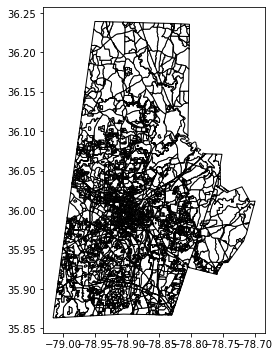

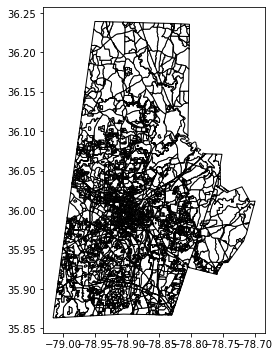

In [12]:
#plotting durham county shapefile

fig, ax = plt.subplots(figsize=(6,6))
durham_county.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})


In [ ]:
#checking for missing points of latitude and getting their place of arrest
# to use for finding coordintes
coord.loc[coord["latitude"].isna()]["placeofarrest"]

In [15]:
#number 1: changing latitude and longitude coordinates for addresses with incorrect values
coord.loc[coord.placeofarrest == "1399 MARTIN LUTHER KING JR PKWY/DIXON RD,", "latitude"] = 35.958450
coord.loc[coord.placeofarrest == "1399 MARTIN LUTHER KING JR PKWY/DIXON RD,", "longitude"] = -78.940598
coord.loc[coord.placeofarrest == "1499 MARTIN LUTHER KING JR PKWY/MOSSDALE", "latitude"] = 35.958450
coord.loc[coord.placeofarrest == "1499 MARTIN LUTHER KING JR PKWY/MOSSDALE", "longitude"] = -78.940598
coord.loc[coord.placeofarrest == "1899 MARTIN LUTHER KING JR PKWY/UNIVERSITY", "latitude"] = 35.960918
coord.loc[coord.placeofarrest == "1899 MARTIN LUTHER KING JR PKWY/UNIVERSITY", "longitude"] = -78.958435
coord.loc[coord.placeofarrest == "699 MARTIN LUTHER KING JR PKWY/STRATFORD", "latitude"] = 35.958450
coord.loc[coord.placeofarrest == "699 MARTIN LUTHER KING JR PKWY/STRATFORD", "longitude"] = -78.940598
coord.loc[coord.placeofarrest == "4299 UNIVERSITY DR/MARTIN LUTHER KING JR", "latitude"] = 35.962410
coord.loc[coord.placeofarrest == "4299 UNIVERSITY DR/MARTIN LUTHER KING JR", "longitude"] = -78.960747
coord.loc[coord.placeofarrest == "1699 MARTIN LUTHER KING JR PKWY/OLD CHAPEL", "latitude"] = 35.958450
coord.loc[coord.placeofarrest == "1699 MARTIN LUTHER KING JR PKWY/OLD CHAPEL", "longitude"] = -78.940598
coord.loc[coord.placeofarrest == "820 MARTIN LUTHER KING JR PKWY - T07,", "latitude"] = 35.944530
coord.loc[coord.placeofarrest == "820 MARTIN LUTHER KING JR PKWY - T07,", "longitude"] = -78.920753
coord.loc[coord.placeofarrest == "1299 MARTIN LUTHER KING JR PKWY/HOPE", "latitude"] = 35.958450
coord.loc[coord.placeofarrest == "1299 MARTIN LUTHER KING JR PKWY/HOPE", "longitude"] = -78.940598
coord.loc[coord.placeofarrest == "0 US 15 501 HWY N/NC 751 HWY, DURHAM", "latitude"] = 35.998137
coord.loc[coord.placeofarrest == "0 US 15 501 HWY N/NC 751 HWY, DURHAM", "longitude"] = -78.958218
coord.loc[coord.placeofarrest == "0 US 15 501 HWY S/NC 751 HWY, DURHAM", "latitude"] = 35.998137
coord.loc[coord.placeofarrest == "0 US 15 501 HWY S/NC 751 HWY, DURHAM", "longitude"] = -78.958218
coord.loc[coord.placeofarrest == "1799 MARTIN LUTHER KING JR PKWY/SHANNON", "latitude"] = 35.960786
coord.loc[coord.placeofarrest == "1799 MARTIN LUTHER KING JR PKWY/SHANNON", "longitude"] = -78.953787
coord.loc[coord.placeofarrest == "199 LIBERTY ST/N CHURCH ST, DURHAM", "latitude"] = 35.996016
coord.loc[coord.placeofarrest == "199 LIBERTY ST/N CHURCH ST, DURHAM", "longitude"] = -78.897928
coord.loc[coord.placeofarrest == "1202 KENDALL DR, DURHAM", "latitude"] = 35.9700935
coord.loc[coord.placeofarrest == "1202 KENDALL DR, DURHAM", "longitude"] = -78.841943
coord.loc[coord.placeofarrest == "I 40 W/I 40 E EXIT 270", "latitude"] = 35.947660
coord.loc[coord.placeofarrest == "I 40 W/I 40 E EXIT 270", "longitude"] = -78.995847
coord.loc[coord.placeofarrest == "6295 JIMMY CARTER BLVD - 262, NORCROSS", "latitude"] = 35.9676563
coord.loc[coord.placeofarrest == "6295 JIMMY CARTER BLVD - 262, NORCROSS", "longitude"] = -78.8563456
coord.loc[coord.placeofarrest == "17817 I85 N/US 70 BYP HWY E, DURHAM", "latitude"] = 36.013498
coord.loc[coord.placeofarrest == "17817 I85 N/US 70 BYP HWY E, DURHAM", "longitude"] = -78.869055
coord.loc[coord.placeofarrest == "1399 UNIVERSITY DR/E FOREST HILLS PLZ,", "latitude"] = 35.983964
coord.loc[coord.placeofarrest == "1399 UNIVERSITY DR/E FOREST HILLS PLZ,", "longitude"] = -78.91189
coord.loc[coord.placeofarrest == "269 I 40 E/I 40 E EXIT 270, CHAPEL HILL", "latitude"] = 35.947660
coord.loc[coord.placeofarrest == "269 I 40 E/I 40 E EXIT 270, CHAPEL HILL", "longitude"] = -78.995847
coord.loc[coord.placeofarrest == "I 40 W/I 40 W ENT 270, CHAPEL HILL", "latitude"] = 35.947660
coord.loc[coord.placeofarrest == "I 40 W/I 40 W ENT 270, CHAPEL HILL", "longitude"] = -78.995847
coord.loc[coord.placeofarrest == "17799 I85 S/US 70 BYP HWY W, DURHAM", "latitude"] = 36.013498
coord.loc[coord.placeofarrest == "17799 I85 S/US 70 BYP HWY W, DURHAM", "longitude"] = -78.869055
coord.loc[coord.placeofarrest == "1199 MARTIN LUTHER KING JR PKWY/ARCHDALE", "latitude"] = 35.953257
coord.loc[coord.placeofarrest == "1199 MARTIN LUTHER KING JR PKWY/ARCHDALE", "longitude"] = -78.928938
coord.loc[coord.placeofarrest == "4923 FOX HUNT DR, DURHAM", "latitude"] = 36.07752
coord.loc[coord.placeofarrest == "4923 FOX HUNT DR, DURHAM", "longitude"] = -78.90268
coord.loc[coord.placeofarrest == "2799 NC 55 HWY/OAKMONT AVE, DURHAM", "latitude"] = 35.94374
coord.loc[coord.placeofarrest == "2799 NC 55 HWY/OAKMONT AVE, DURHAM", "longitude"] = -78.88706
coord.loc[coord.placeofarrest == "3499 NC 55 HWY/ODYSSEY DR, DURHAM", "latitude"] = 35.928544
coord.loc[coord.placeofarrest == "3499 NC 55 HWY/ODYSSEY DR, DURHAM", "longitude"] = -78.888963
coord.loc[coord.placeofarrest == "1799 NC 55 HWY/HOPE AVE, DURHAM", "latitude"] = 35.96848
coord.loc[coord.placeofarrest == "1799 NC 55 HWY/HOPE AVE, DURHAM", "longitude"] = -78.89532
coord.loc[coord.placeofarrest == "4899 NC 55 HWY/ALLENDOWN DR, DURHAM", "latitude"] = 35.89895
coord.loc[coord.placeofarrest == "4899 NC 55 HWY/ALLENDOWN DR, DURHAM", "longitude"] = -78.8966
coord.loc[coord.placeofarrest == "2499 NC 55 HWY/RIDDLE RD, DURHAM", "latitude"] = 35.957784
coord.loc[coord.placeofarrest == "2499 NC 55 HWY/RIDDLE RD, DURHAM", "longitude"] = -78.877542
coord.loc[coord.placeofarrest == "1599 NC 55 HWY/CECIL ST, DURHAM", "latitude"] = 35.97114
coord.loc[coord.placeofarrest == "1599 NC 55 HWY/CECIL ST, DURHAM", "longitude"] = -78.89479
coord.loc[coord.placeofarrest == "3280 NC 55 HWY, DURHAM", "latitude"] = 35.933862
coord.loc[coord.placeofarrest == "3280 NC 55 HWY, DURHAM", "longitude"] = -78.888184
coord.loc[coord.placeofarrest == "2695 NC 55 HWY/WHILDEN DR, DURHAM", "latitude"] = 35.9465
coord.loc[coord.placeofarrest == "2695 NC 55 HWY/WHILDEN DR, DURHAM", "longitude"] = -78.88783
coord.loc[coord.placeofarrest == "5405 NC 55 HWY, DURHAM", "latitude"] = 35.890083
coord.loc[coord.placeofarrest == "5405 NC 55 HWY, DURHAM", "longitude"] = -78.896044
coord.loc[coord.placeofarrest == "1699 NC 55 HWY/BURLINGTON AVE, DURHAM", "latitude"] = 35.96937
coord.loc[coord.placeofarrest == "1699 NC 55 HWY/BURLINGTON AVE, DURHAM", "longitude"] = -78.89521
coord.loc[coord.placeofarrest == "4500 NC 55 HWY, DURHAM", "latitude"] = 35.907729
coord.loc[coord.placeofarrest == "4500 NC 55 HWY, DURHAM", "longitude"] = -78.893902
coord.loc[coord.placeofarrest == "5207 NC 55 HWY, DURHAM", "latitude"] = 35.892927
coord.loc[coord.placeofarrest == "5207 NC 55 HWY, DURHAM", "longitude"] = -78.896902
coord.loc[coord.placeofarrest == "5407 NC 55 HWY, DURHAM", "latitude"] = 35.890066
coord.loc[coord.placeofarrest == "5407 NC 55 HWY, DURHAM", "longitude"] = -78.896038
coord.loc[coord.placeofarrest == "US 15 501 HWY N/NC 751 HWY, DURHAM", "latitude"] = 35.94989
coord.loc[coord.placeofarrest == "US 15 501 HWY N/NC 751 HWY, DURHAM", "longitude"] = -78.9388
coord.loc[coord.placeofarrest == "10600 US 15 501 HWY N, DURHAM", "latitude"] = 35.9983
coord.loc[coord.placeofarrest == "10600 US 15 501 HWY N, DURHAM", "longitude"] = -78.89789
coord.loc[coord.placeofarrest == "10610 US 15 501 HWY S, DURHAM", "latitude"] = 35.986889
coord.loc[coord.placeofarrest == "10610 US 15 501 HWY S, DURHAM", "longitude"] = -78.901123
coord.loc[coord.placeofarrest == "10601 US 15 501 HWY N, DURHAM", "latitude"] = 35.9983
coord.loc[coord.placeofarrest == "10601 US 15 501 HWY N, DURHAM", "longitude"] = -78.89789
coord.loc[coord.placeofarrest == "10500 US 15 501 HWY N, DURHAM", "latitude"] = 35.9983
coord.loc[coord.placeofarrest == "10500 US 15 501 HWY N, DURHAM", "longitude"] = -78.89789
coord.loc[coord.placeofarrest == "4499 NC 55 HWY/WEST PARK DR, DURHAM", "latitude"] = 35.90826
coord.loc[coord.placeofarrest == "4499 NC 55 HWY/WEST PARK DR, DURHAM", "longitude"] = -78.89374
coord.loc[coord.placeofarrest == "10610 US 15 501 HWY N, DURHAM", "latitude"] = 35.9983
coord.loc[coord.placeofarrest == "10610 US 15 501 HWY N, DURHAM", "longitude"] = -78.89789
coord.loc[coord.placeofarrest == "4511 NC 55 HWY/PARK FORTY PLZ, DURHAM", "latitude"] = 35.905015
coord.loc[coord.placeofarrest == "4511 NC 55 HWY/PARK FORTY PLZ, DURHAM", "longitude"] = -78.89477
coord.loc[coord.placeofarrest == "10800 US 15 501 HWY N, DURHAM", "latitude"] = 35.9983
coord.loc[coord.placeofarrest == "10800 US 15 501 HWY N, DURHAM", "longitude"] = -78.89789
coord.loc[coord.placeofarrest == "4199 NC 55 HWY/CARPENTER FLETCHER RD,", "latitude"] = 35.91541
coord.loc[coord.placeofarrest == "4199 NC 55 HWY/CARPENTER FLETCHER RD,", "longitude"] = -78.89144
coord.loc[coord.placeofarrest == "10565 US 15 501 HWY S, DURHAM", "latitude"] = 35.986889
coord.loc[coord.placeofarrest == "10565 US 15 501 HWY S, DURHAM", "longitude"] = -78.901123
coord.loc[coord.placeofarrest == "10600 US 15 501 HWY S, DURHAM", "latitude"] = 35.986889
coord.loc[coord.placeofarrest == "10600 US 15 501 HWY S, DURHAM", "longitude"] = -78.901123
coord.loc[coord.placeofarrest == "4519 NC 55 HWY, DURHAM", "latitude"] = 35.904559
coord.loc[coord.placeofarrest == "4519 NC 55 HWY, DURHAM", "longitude"] = -78.894891
coord.loc[coord.placeofarrest == "10500 US 15 501 HWY S, DURHAM", "latitude"] = 35.986889
coord.loc[coord.placeofarrest == "10500 US 15 501 HWY S, DURHAM", "longitude"] = -78.901123
coord.loc[coord.placeofarrest == "10700 US 15 501 HWY N, DURHAM", "latitude"] = 35.9983
coord.loc[coord.placeofarrest == "10700 US 15 501 HWY N, DURHAM", "longitude"] = -78.89789
coord.loc[coord.placeofarrest == "10814 US 15 501 HWY N, DURHAM", "latitude"] = 35.9983
coord.loc[coord.placeofarrest == "10814 US 15 501 HWY N, DURHAM", "longitude"] = -78.89789
coord.loc[coord.placeofarrest == "0 GUESS RD/I85 N, DURHAM", "latitude"] = 36.08358
coord.loc[coord.placeofarrest == "0 GUESS RD/I85 N, DURHAM", "longitude"] = -78.93197
coord.loc[coord.placeofarrest == "10830 US 15 501 HWY S, DURHAM", "latitude"] = 35.986889
coord.loc[coord.placeofarrest == "10830 US 15 501 HWY S, DURHAM", "longitude"] = -78.901123
coord.loc[coord.placeofarrest == "US 15 501 HWY N/I85 N, DURHAM", "latitude"] = 35.9983
coord.loc[coord.placeofarrest == "US 15 501 HWY N/I85 N, DURHAM", "longitude"] = -78.89789
coord.loc[coord.placeofarrest == "6199 FAYETTEVILLE RD/LAUREL SPRINGS DR,", "latitude"] = 35.91506
coord.loc[coord.placeofarrest == "6199 FAYETTEVILLE RD/LAUREL SPRINGS DR,", "longitude"] = -78.93233
coord.loc[coord.placeofarrest == "US 15 501 HWY N/I85 N, DURHAM", "latitude"] = 35.9983
coord.loc[coord.placeofarrest == "US 15 501 HWY N/I85 N, DURHAM", "longitude"] = -78.89789
coord.loc[coord.placeofarrest == "2199 NC 55 HWY/CHERRY DR, DURHAM", "latitude"] = 35.960177
coord.loc[coord.placeofarrest == "2199 NC 55 HWY/CHERRY DR, DURHAM", "longitude"] = -78.893431
coord.loc[coord.placeofarrest == "US 15 501 HWY S/I85 S, DURHAM", "latitude"] = 35.986889
coord.loc[coord.placeofarrest == "US 15 501 HWY S/I85 S, DURHAM", "longitude"] = -78.901123
coord.loc[coord.placeofarrest == "6399 FAYETTEVILLE RD/CROOKED CREEK PKWY,", "latitude"] = 35.911265
coord.loc[coord.placeofarrest == "6399 FAYETTEVILLE RD/CROOKED CREEK PKWY,", "longitude"] = -78.934268
coord.loc[coord.placeofarrest == "4399 FAYETTEVILLE RD/STRATFORD LAKES DR,", "latitude"] = 35.986889
coord.loc[coord.placeofarrest == "4399 FAYETTEVILLE RD/STRATFORD LAKES DR,", "longitude"] = -78.901123
coord.loc[coord.placeofarrest == "4399 FAYETTEVILLE RD/STRATFORD LAKES DR,", "latitude"] = 35.986889
coord.loc[coord.placeofarrest == "4399 FAYETTEVILLE RD/STRATFORD LAKES DR,", "longitude"] = -78.901123
coord.loc[coord.placeofarrest == "0 US 15 501 HWY S/I85 S, DURHAM", "latitude"] = 35.98677
coord.loc[coord.placeofarrest == "0 US 15 501 HWY S/I85 S, DURHAM", "longitude"] = -78.90838
coord.loc[coord.placeofarrest == "3200 NC 55 HWY, DURHAM", "latitude"] = 35.935577
coord.loc[coord.placeofarrest == "3200 NC 55 HWY, DURHAM", "longitude"] = -78.88788
coord.loc[coord.placeofarrest == "0 NC 751 HWY/I40 W, DURHAM", "latitude"] = 35.94989
coord.loc[coord.placeofarrest == "0 NC 751 HWY/I40 W, DURHAM", "longitude"] = -78.9388
coord.loc[coord.placeofarrest == "1500 NC 55 HWY/S ALSTON AVE, DURHAM", "latitude"] = 35.97063
coord.loc[coord.placeofarrest == "1500 NC 55 HWY/S ALSTON AVE, DURHAM", "longitude"] = -78.89342
coord.loc[coord.placeofarrest == "999 OLD FAYETTEVILLE ST/FAYETTEVILLE ST,", "latitude"] = 35.98415
coord.loc[coord.placeofarrest == "999 OLD FAYETTEVILLE ST/FAYETTEVILLE ST,", "longitude"] = -78.89905
coord.loc[coord.placeofarrest == "1799 NC 54 HWY E/SEAFORTH DR, DURHAM", "latitude"] = 35.904977
coord.loc[coord.placeofarrest == "1799 NC 54 HWY E/SEAFORTH DR, DURHAM", "longitude"] = -78.902986
coord.loc[coord.placeofarrest == "US 15 501 HWY S/W CORNWALLIS RD, DURHAM", "latitude"] = 35.97024
coord.loc[coord.placeofarrest == "US 15 501 HWY S/W CORNWALLIS RD, DURHAM", "longitude"] = -78.92744
coord.loc[coord.placeofarrest == "640 VALLEY FORGE RD - BLK, HILLSBOROUGH", "latitude"] = 36.06459
coord.loc[coord.placeofarrest == "640 VALLEY FORGE RD - BLK, HILLSBOROUGH", "longitude"] = -79.08603
coord.loc[coord.placeofarrest == "1817 MARTIN LUTHER KING JR BLVD, CHAPEL HILL", "latitude"] = 35.964524
coord.loc[coord.placeofarrest == "1817 MARTIN LUTHER KING JR BLVD, CHAPEL HILL", "longitude"] = -79.058693
coord.loc[coord.placeofarrest == "I540/I540 S, DURHAM", "latitude"] = 35.99545
coord.loc[coord.placeofarrest == "I540/I540 S, DURHAM", "longitude"] = -78.89651
coord.loc[coord.placeofarrest == "US 15 501 HWY N/W CORNWALLIS RD, DURHAM", "latitude"] = 35.97024
coord.loc[coord.placeofarrest == "US 15 501 HWY N/W CORNWALLIS RD, DURHAM", "longitude"] = -78.92744
coord.loc[coord.placeofarrest == "10812 US 15 501 HWY N, DURHAM", "latitude"] = 35.9983
coord.loc[coord.placeofarrest == "10812 US 15 501 HWY N, DURHAM", "longitude"] = -78.89789
coord = coord.loc[coord["placeofarrest"] != "201 N SHARTEL AVE, OKLAHOMA CITY"]
coord = coord.loc[coord["placeofarrest"] != "109 D STREET NE, WASHINGTON DC"]
coord.loc[coord.placeofarrest == "2800 CANNADA AVE/SHARI CT, DURHAM", "latitude"] = 36.03738
coord.loc[coord.placeofarrest == "2800 CANNADA AVE/SHARI CT, DURHAM", "longitude"] = -78.88249
coord.loc[coord.placeofarrest == "4499 FAYETTEVILLE RD/MARTIN LUTHER KING JR", "latitude"] = 35.93971
coord.loc[coord.placeofarrest == "4499 FAYETTEVILLE RD/MARTIN LUTHER KING JR", "longitude"] = -78.90665
coord.loc[coord.placeofarrest == "508 RIPPLING STREAM RD, DURHAM", "latitude"] = 36.07238
coord.loc[coord.placeofarrest == "508 RIPPLING STREAM RD, DURHAM", "longitude"] = -78.90178
coord.loc[coord.placeofarrest == "811 W KNOX ST, DURHAM", "latitude"] = 36.01294	
coord.loc[coord.placeofarrest == "811 W KNOX ST, DURHAM", "longitude"] = -78.90397


In [16]:
#number 2 
coord.loc[coord.placeofarrest == "4800 UNIVERSITY DR - 12H, DURHAM", "latitude"] = 35.955450
coord.loc[coord.placeofarrest == "4800 UNIVERSITY DR - 12H, DURHAM", "longitude"] = -78.967540
coord.loc[coord.placeofarrest == "749 NINTH ST, DURHAM", "latitude"] = 36.009060
coord.loc[coord.placeofarrest == "749 NINTH ST, DURHAM", "longitude"] = -78.924250
coord.loc[coord.placeofarrest == "1205 UNIVERSITY DR, DURHAM", "latitude"] = 35.984690
coord.loc[coord.placeofarrest == "1205 UNIVERSITY DR, DURHAM", "longitude"] = -78.909920
coord.loc[coord.placeofarrest == "799 MARTIN LUTHER KING JR PKWY/LAKE COOK", "latitude"] = 35.946020
coord.loc[coord.placeofarrest == "799 MARTIN LUTHER KING JR PKWY/LAKE COOK", "longitude"] = -78.921650
coord.loc[coord.placeofarrest == "599 ARCHDALE DR/MARTIN LUTHER KING JR", "latitude"] = 35.957100
coord.loc[coord.placeofarrest == "599 ARCHDALE DR/MARTIN LUTHER KING JR", "longitude"] = -78.933020
coord.loc[coord.placeofarrest == "2000 CHAPEL HILL RD, DURHAM", "latitude"] = 35.9868
coord.loc[coord.placeofarrest == "2000 CHAPEL HILL RD, DURHAM", "longitude"] = -78.92721
coord.loc[coord.placeofarrest == "4037 DURHAM CHAPEL HILL BLVD, DURHAM", "latitude"] = 35.9693
coord.loc[coord.placeofarrest == "4037 DURHAM CHAPEL HILL BLVD, DURHAM", "longitude"] = -78.95748
coord.loc[coord.placeofarrest == "402 MACON ST - A, DURHAM", "latitude"] = 36.00913
coord.loc[coord.placeofarrest == "402 MACON ST - A, DURHAM", "longitude"] = -78.90005
coord.loc[coord.placeofarrest == "4499 FAYETTEVILLE RD/MARTIN LUTHER KING JR", "latitude"] = 35.93971
coord.loc[coord.placeofarrest == "4499 FAYETTEVILLE RD/MARTIN LUTHER KING JR", "longitude"] = -78.90665
coord.loc[coord.placeofarrest == "4599 DURHAM CHAPEL HILL BLVD/GARRETT RD,", "latitude"] = 35.955313
coord.loc[coord.placeofarrest == "4599 DURHAM CHAPEL HILL BLVD/GARRETT RD,", "longitude"] = -78.972994
coord.loc[coord.placeofarrest == "3701 MT MORIAH RD, DURHAM", "latitude"] = 35.94862
coord.loc[coord.placeofarrest == "3701 MT MORIAH RD, DURHAM", "longitude"] = -78.99445
coord.loc[coord.placeofarrest == "2999 ASHLEY ST/W CARVER ST, DURHAM", "latitude"] = 36.03753
coord.loc[coord.placeofarrest == "2999 ASHLEY ST/W CARVER ST, DURHAM", "longitude"] = -78.93542
coord.loc[coord.placeofarrest == "3299 S ALSTON AVE/DIAL DR, DURHAM", "latitude"] = 35.93996
coord.loc[coord.placeofarrest == "3299 S ALSTON AVE/DIAL DR, DURHAM", "longitude"] = -78.88358
coord.loc[coord.placeofarrest == "2510 S ROXBORO ST, DURHAM", "latitude"] = 35.966630
coord.loc[coord.placeofarrest == "2510 S ROXBORO ST, DURHAM", "longitude"] = -78.917300
coord.loc[coord.placeofarrest == "4499 FAYETTEVILLE RD/MARTIN LUTHER KING JR", "latitude"] = 35.997189
coord.loc[coord.placeofarrest == "4499 FAYETTEVILLE RD/MARTIN LUTHER KING JR", "longitude"] = -78.938612
coord.loc[coord.placeofarrest == "508 RIPPLING STREAM RD, DURHAM", "latitude"] = 36.072110
coord.loc[coord.placeofarrest == "508 RIPPLING STREAM RD, DURHAM", "longitude"] = -78.901610
coord.loc[coord.placeofarrest == "811 W KNOX ST, DURHAM", "latitude"] = 36.012720
coord.loc[coord.placeofarrest == "811 W KNOX ST, DURHAM", "longitude"] = -78.903980
coord.loc[coord.placeofarrest == "219 S MANGUM ST, DURHAM", "latitude"] = 35.992860
coord.loc[coord.placeofarrest == "219 S MANGUM ST, DURHAM", "longitude"] = -78.900630
coord.loc[coord.placeofarrest == "3454 HILLSBOROUGH RD, DURHAM", "latitude"] = 36.0197896
coord.loc[coord.placeofarrest == "3454 HILLSBOROUGH RD, DURHAM", "longitude"] = -78.947182
coord.loc[coord.placeofarrest == "500 SIMMONS ST/FAYETTEVILLE ST, DURHAM", "latitude"] = 35.987234
coord.loc[coord.placeofarrest == "500 SIMMONS ST/FAYETTEVILLE ST, DURHAM", "longitude"] = -78.897785
coord.loc[coord.placeofarrest == "305 E CLUB BLVD, DURHAM", "latitude"] = 36.022969
coord.loc[coord.placeofarrest == "305 E CLUB BLVD, DURHAM", "longitude"] = -78.878847
coord.loc[coord.placeofarrest == "59 MOORE DR, DURHAM", "latitude"] = 35.933466
coord.loc[coord.placeofarrest == "59 MOORE DR, DURHAM", "longitude"] = -78.864399
coord.loc[coord.placeofarrest == "4499 FAYETTEVILLE RD/MARTIN LUTHER KING JR", "latitude"] = 35.986889
coord.loc[coord.placeofarrest == "4499 FAYETTEVILLE RD/MARTIN LUTHER KING JR", "longitude"] = -78.901123
coord.loc[coord.placeofarrest == "3801 N DUKE ST, DURHAM", "latitude"] = 36.0515227
coord.loc[coord.placeofarrest == "3801 N DUKE ST, DURHAM", "longitude"] = -78.905973
coord.loc[coord.placeofarrest == "2800 CANNADA AVE/SHARI CT, DURHAM", "latitude"] = 35.997189
coord.loc[coord.placeofarrest == "2800 CANNADA AVE/SHARI CT, DURHAM", "longitude"] = 78.938612
coord.loc[coord.placeofarrest == "311 S LASALLE ST - 26, DURHAM", "latitude"] = 36.013633
coord.loc[coord.placeofarrest == "311 S LASALLE ST - 26, DURHAM", "longitude"] = -78.948087
coord.loc[coord.placeofarrest == "328 VILLANOVA DR, DURHAM", "latitude"] = 35.8834511
coord.loc[coord.placeofarrest == "328 VILLANOVA DR, DURHAM", "longitude"] = -78.8916226
coord.loc[coord.placeofarrest == "1506 GRANBY ST, DURHAM", "latitude"] = 36.0008984
coord.loc[coord.placeofarrest == "1506 GRANBY ST, DURHAM", "longitude"] = -78.8827668
coord.loc[coord.placeofarrest == "951 E MAIN ST/S ELM ST, DURHAM", "latitude"] = 35.985058
coord.loc[coord.placeofarrest == "951 E MAIN ST/S ELM ST, DURHAM", "longitude"] = -78.90592
coord.loc[coord.placeofarrest == "5705 SKY LANE DR, DURHAM", "latitude"] = 36.05794
coord.loc[coord.placeofarrest == "5705 SKY LANE DR, DURHAM", "longitude"] = -78.78634
coord.loc[coord.placeofarrest == "1800 WILLIAMSBURG RD, DURHAM", "latitude"] = 35.9576
coord.loc[coord.placeofarrest == "1800 WILLIAMSBURG RD, DURHAM", "longitude"] = -78.95857
coord.loc[coord.placeofarrest == "0 US 70 BYP HWY E/TEMP ONRAMP FROM NC98", "latitude"] = 35.986889
coord.loc[coord.placeofarrest == "0 US 70 BYP HWY E/TEMP ONRAMP FROM NC98", "longitude"] = -78.901123
coord.loc[coord.placeofarrest == "107 S ELM ST/DALE ST, DURHAM", "latitude"] = 35.98844
coord.loc[coord.placeofarrest == "107 S ELM ST/DALE ST, DURHAM", "longitude"] = -78.89027
coord.loc[coord.placeofarrest == "5422 NEW HOPE COMMONS DR, DURHAM", "latitude"] = 35.95414
coord.loc[coord.placeofarrest == "5422 NEW HOPE COMMONS DR, DURHAM", "longitude"] = -78.99519
coord.loc[coord.placeofarrest == "5199 N ROXBORO ST/RIPPLING STREAM RD,", "latitude"] = 36.070455
coord.loc[coord.placeofarrest == "5199 N ROXBORO ST/RIPPLING STREAM RD,", "longitude"] = -78.908179
coord.loc[coord.placeofarrest == "1525 GLENN SCHOOL RD, DURHAM", "latitude"] = 36.02703
coord.loc[coord.placeofarrest == "1525 GLENN SCHOOL RD, DURHAM", "longitude"] = -78.84102
coord.loc[coord.placeofarrest == "901 CHALK LEVEL RD - R5, DURHAM", "latitude"] = 36.05116
coord.loc[coord.placeofarrest == "901 CHALK LEVEL RD - R5, DURHAM", "longitude"] = -78.91156
coord.loc[coord.placeofarrest == "15 DOROTHY DR - A, DURHAM", "latitude"] = 35.976215
coord.loc[coord.placeofarrest == "15 DOROTHY DR - A, DURHAM", "longitude"] = -78.888322
coord.loc[coord.placeofarrest == "2109 N ROXBORO ST, DURHAM", "latitude"] = 36.01824
coord.loc[coord.placeofarrest == "2109 N ROXBORO ST, DURHAM", "longitude"] = -78.88998
coord.loc[coord.placeofarrest == "808 AMARILLO ROSE LN, DURHAM", "latitude"] = 36.09551
coord.loc[coord.placeofarrest == "808 AMARILLO ROSE LN, DURHAM", "longitude"] = -78.91815
coord.loc[coord.placeofarrest == "1720 CHEEK RD, DURHAM", "latitude"] = 36.00404
coord.loc[coord.placeofarrest == "1720 CHEEK RD, DURHAM", "longitude"] = -78.87193
coord.loc[coord.placeofarrest == "6910 FAYETTEVILLE RD, DURHAM", "latitude"] = 35.90352
coord.loc[coord.placeofarrest == "6910 FAYETTEVILLE RD, DURHAM", "longitude"] = -78.9388
coord.loc[coord.placeofarrest == "415 COMMONWEALTH ST, DURHAM", "latitude"] = 35.972699
coord.loc[coord.placeofarrest == "415 COMMONWEALTH ST, DURHAM", "longitude"] = -78.862864
coord.loc[coord.placeofarrest == "2804 NATION AVE, DURHAM", "latitude"] = 35.97633
coord.loc[coord.placeofarrest == "2804 NATION AVE, DURHAM", "longitude"] = -78.9351
coord.loc[coord.placeofarrest == "1299 HOLLOWAY ST/N DRIVER ST, DURHAM", "latitude"] = 35.99807
coord.loc[coord.placeofarrest == "1299 HOLLOWAY ST/N DRIVER ST, DURHAM", "longitude"] = -78.877846
coord.loc[coord.placeofarrest == "4699 INDUSTRY LN/MARTIN LUTHER KING JR", "latitude"] = 35.939184
coord.loc[coord.placeofarrest == "4699 INDUSTRY LN/MARTIN LUTHER KING JR", "longitude"] = -78.902632
coord.loc[coord.placeofarrest == "3507 DEARBORN DR, DURHAM", "latitude"] = 36.03837
coord.loc[coord.placeofarrest == "3507 DEARBORN DR, DURHAM", "longitude"] = -78.87789
coord.loc[coord.placeofarrest == "561 LIBERTY ST - 16, DURHAM", "latitude"] = 35.99296
coord.loc[coord.placeofarrest == "561 LIBERTY ST - 16, DURHAM", "longitude"] = -78.89207
coord.loc[coord.placeofarrest == "699 LAKELAND ST/RIDGEWAY AVE, DURHAM", "latitude"] = 35.97991
coord.loc[coord.placeofarrest == "699 LAKELAND ST/RIDGEWAY AVE, DURHAM", "longitude"] = -78.89013
coord.loc[coord.placeofarrest == "1209 FAYETTEVILLE ST/SIMMONS ST, DURHAM", "latitude"] = 35.98251
coord.loc[coord.placeofarrest == "1209 FAYETTEVILLE ST/SIMMONS ST, DURHAM", "longitude"] = -78.8989

In [19]:
#final step !!!!! converting the spatial dataframe into a csv

#coord.to_csv("/Users/morganbernstein/Desktop/DATA+/SToPAGetDurhamData/30 Spatial Mapping/!finalcoordinates.csv")

In [20]:
#reading in the dataframe we just made
coordin = pd.read_csv("/Users/morganbernstein/Desktop/DATA+/SToPAGetDurhamData/30 Spatial Mapping/!final coordinates.csv", index_col=[0], low_memory = False)

<AxesSubplot:>

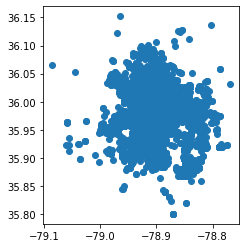

In [22]:
#making the data into a new geodataframe with geometry column, and plotting

geodata = gpd.GeoDataFrame(coordin, geometry = gpd.points_from_xy(coordin.longitude, coordin.latitude))
geodata.plot()

In [24]:
#converting the geodataframe to a shapefile 
#geodata.to_csv("/Users/morganbernstein/Desktop/DATA+/SToPAGetDurhamData/30 Spatial Mapping/spatialshapefile.shp")

In [30]:
#reading in beats shapefile
beats = gpd.read_file("/Users/morganbernstein/Desktop/Data+/filtered_beats/filtered_beats.shp")

,agencyname,name,datetimeofarrest,file,arrestnumber,scars_tattoes_bodymarkings_etc,birthday,age,race,sex,...,charge25warrantdate,charge4counts,dates,time,year,month,day,latitude,longitude,geometry
0,Durham Police Department,"AARON, JOSEPH MATTHEW",02/03/2021 16:07,00 Raw Data/data/arrests0005777.pdf,321921,NaN,03/14/1989,31,B,M,...,NaN,NaN,2021-02-03,16:07:00,2021,2,3,36.048962,-78.912580,POINT (-78.91258 36.04896)
1,Durham Police Department,"AARON, JOSEPH MATTHEW",07/19/2020 04:33,missing2/arrests0000251.pdf,319178,NaN,03/14/1989,31,B,M,...,NaN,NaN,2020-07-19,04:33:00,2020,7,19,36.013981,-78.941950,POINT (-78.94195 36.01398)
2,Durham Police Department,"AARON, JOSEPH MATTHEW",12/29/2020 13:46,00 Raw Data/data/arrests0010114.pdf,321362,NaN,03/14/1989,31,B,M,...,NaN,NaN,2020-12-29,13:46:00,2020,12,29,36.052313,-78.915151,POINT (-78.91515 36.05231)
3,Durham Police Department,"ABARCA, EDUARDO NAVARETTE",04/07/2019 02:21,00 Raw Data/data/arrests0016967.pdf,310474,NaN,07/04/1978,40,W,M,...,NaN,NaN,2019-04-07,02:21:00,2019,4,7,35.939710,-78.906650,POINT (-78.90665 35.93971)
4,Durham Police Department,"ABATE, ALISON MARIE",12/18/2021 12:39,00 Raw Data/data/arrests0000407.pdf,327447,SCAR NO NOSE,02/13/1966,55,W,F,...,NaN,NaN,2021-12-18,12:39:00,2021,12,18,36.029534,-78.973403,POINT (-78.97340 36.02953)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17153,Durham Police Department,"ZUNIGA, CHARISMA VICTORIA",04/11/2019 12:33,00 Raw Data/data/arrests0016887.pdf,310545,NaN,07/24/1981,37,B,F,...,NaN,NaN,2019-04-11,12:33:00,2019,4,11,35.979294,-78.892001,POINT (-78.89200 35.97929)
17154,Durham Police Department,"ZUNIGA, CHARISMA VICTORIA",04/18/2022 16:16,00 Raw Data/data/arrests0005108.pdf,330146,NaN,07/24/1981,40,B,F,...,NaN,NaN,2022-04-18,16:16:00,2022,4,18,35.903520,-78.938800,POINT (-78.93880 35.90352)
17155,Durham Police Department,"ZUNIGA, CHARISMA VICTORIA",04/18/2022 16:18,00 Raw Data/data/arrests0005084.pdf,330147,NaN,07/24/1981,40,B,F,...,NaN,NaN,2022-04-18,16:18:00,2022,4,18,35.903520,-78.938800,POINT (-78.93880 35.90352)
17156,Durham Police Department,"ZUNIGA, JOSE LUIS",04/20/2019 20:00,00 Raw Data/data/arrests0016680.pdf,310710,NaN,04/12/1975,44,W,M,...,NaN,NaN,2019-04-20,20:00:00,2019,4,20,35.902774,-78.956577,POINT (-78.95658 35.90277)


In [32]:
#using sjoin_nearest to aggregate each arrest to the nearest beat
arrests_per_beat = gpd.sjoin_nearest(geodata,
    beats,
    distance_col="distance",
)
arrests_per_beat


/var/folders/kc/zg1krfm17h74s97_rljtrhpr0000gn/T/ipykernel_32372/3267107122.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  arrests_per_beat = gpd.sjoin_nearest(geodata,
/Users/morganbernstein/opt/anaconda3/envs/geo/lib/python3.10/site-packages/geopandas/array.py:340: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,agencyname,name,datetimeofarrest,file,arrestnumber,scars_tattoes_bodymarkings_etc,birthday,age,race,sex,...,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,distance
0,Durham Police Department,"AARON, JOSEPH MATTHEW",02/03/2021 16:07,00 Raw Data/data/arrests0005777.pdf,321921,NaN,03/14/1989,31,B,M,...,50498.308594,I,yes,D2,222,222,None,1.066247e+08,50498.309761,0.000000
2,Durham Police Department,"AARON, JOSEPH MATTHEW",12/29/2020 13:46,00 Raw Data/data/arrests0010114.pdf,321362,NaN,03/14/1989,31,B,M,...,50498.308594,I,yes,D2,222,222,None,1.066247e+08,50498.309761,0.000000
55,Durham Police Department,"ACKLIN, KINGSTON JAMIL",03/02/2021 15:27,00 Raw Data/data/arrests0004947.pdf,322279,NaN,01/20/1995,26,B,M,...,50498.308594,I,yes,D2,222,222,None,1.066247e+08,50498.309761,0.000000
149,Durham Police Department,"ALLEN, AMBER LEIGH",06/12/2020 00:28,00 Raw Data/data/arrests0011969.pdf,318710,NaN,03/19/1997,23,W,F,...,50498.308594,I,yes,D2,222,222,None,1.066247e+08,50498.309761,0.000000
201,Durham Police Department,"ALLEN, NICHOLAS LEE",03/07/2022 21:51,00 Raw Data/data/arrests0000813.pdf,329564,NaN,06/07/1988,33,B,M,...,50498.308594,I,yes,D2,222,222,None,1.066247e+08,50498.309761,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16799,Durham Police Department,"WILSON, DEMETRIA LAMONTA",05/31/2021 17:17,00 Raw Data/data/arrests0004067.pdf,324615,TATT FRON NECK / LARGE RED 5 POINTEDSTAR CENTE...,09/14/1992,28,B,M,...,14495.120117,I,no,D1,121,121,None,7.008533e+06,14495.120026,0.000000
14455,Durham Police Department,"SPENCE, PHILIP KEITH",08/24/2021 10:00,00 Raw Data/data/arrests0002234.pdf,325929,SCAR RIGH HAND,09/19/1964,56,W,M,...,8026.809082,I,no,D1,121,121,None,2.376268e+06,8026.808931,0.030591
14744,Durham Police Department,"SUGGS, ANTONIO DEONDRE",04/15/2019 14:54,00 Raw Data/data/arrests0016791.pdf,310626,TATT BTH ARM,04/04/1987,32,B,M,...,13511.950195,I,no,D2,214,214,None,7.056993e+06,13511.948645,0.000000
14952,Durham Police Department,"TAYLOR, MARIO DEANDRE",07/26/2020 03:06,missing2/arrests0000035.pdf,319280,TATT RIGH ARM; SCAR CH CHIN; SCAR RIGHFARM...,02/18/1980,40,B,M,...,1733.583008,I,no,D1,114,114,None,1.319269e+05,1733.583547,0.000851


In [34]:
#saving the new cvs with each arrest corresponding to a police beat
arrests_per_beat.to_csv("/Users/morganbernstein/Desktop/DATA+/with_beats.csv")